# CIVL 316 Lab 4

In [1]:
from scipy.optimize import fsolve
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

* H - Wave Height (cm)
* T - Wave Period (s)
* time_1m - time for wave crest to travel 1m (s)
* orbital_surface - horizontal diamter close to the surface (cm)
* orbital_bottom - horizontal diamter close to the bottom (cm)

In [2]:
lab4Data = {
    "trial": [1, 2, 3, 4, 5, 6],
    "H": [9.09, 4.18, 2.08, 6.12, 8.88, 4.14],
    "T": [0.93, 1.23, 1.03, 3.02, 2.17, 2.8],
    "time_1m": [0.86, 0.81, 0.84, 0.75, 0.76, 0.75],
    "orbital_surface": [10, 4.6, 2.29, 6.73, 9.76, 4.55],
    "orbital_bottom": [8.18, 3.76, 1.87, 5.51, 7.99, 3.72]
}

In [3]:
df = pd.DataFrame(lab4Data)
df

,trial,H,T,time_1m,orbital_surface,orbital_bottom
0,1,9.09,0.93,0.86,10.00,8.18
1,2,4.18,1.23,0.81,4.60,3.76
2,3,2.08,1.03,0.84,2.29,1.87
3,4,6.12,3.02,0.75,6.73,5.51
4,5,8.88,2.17,0.76,9.76,7.99
5,6,4.14,2.80,0.75,4.55,3.72


* H - Wave Height (m)
* T - Wave Period (s)
* time_1m - time for wave crest to travel 1m (s)
* orbital_surface - horizontal diamter close to the surface (m)
* orbital_bottom - horizontal diamter close to the bottom (m)

In [4]:
# convert Wave Height, Orbital Surface, and Orbital Bottom lengths to metres
df["H"] = df["H"].apply(lambda x: x * 0.01)
df["orbital_surface"] = df["orbital_surface"].apply(lambda x: x * 0.01)
df["orbital_bottom"] = df["orbital_bottom"].apply(lambda x: x * 0.01)
df

,trial,H,T,time_1m,orbital_surface,orbital_bottom
0,1,0.0909,0.93,0.86,0.1000,0.0818
1,2,0.0418,1.23,0.81,0.0460,0.0376
2,3,0.0208,1.03,0.84,0.0229,0.0187
3,4,0.0612,3.02,0.75,0.0673,0.0551
4,5,0.0888,2.17,0.76,0.0976,0.0799
5,6,0.0414,2.80,0.75,0.0455,0.0372


In [5]:
ptA_df = df.drop(columns=["orbital_surface", "orbital_bottom"])
ptA_df

,trial,H,T,time_1m
0,1,0.0909,0.93,0.86
1,2,0.0418,1.23,0.81
2,3,0.0208,1.03,0.84
3,4,0.0612,3.02,0.75
4,5,0.0888,2.17,0.76
5,6,0.0414,2.80,0.75


In [6]:
ptA_df["c_actual"] = 1 / ptA_df["time_1m"]
ptA_df = ptA_df.drop(columns=["time_1m"])
ptA_df

,trial,H,T,c_actual
0,1,0.0909,0.93,1.162791
1,2,0.0418,1.23,1.234568
2,3,0.0208,1.03,1.190476
3,4,0.0612,3.02,1.333333
4,5,0.0888,2.17,1.315789
5,6,0.0414,2.80,1.333333


In [7]:
def getWavelength(rows, g = 9.81, d=0.18):
    wavelength_formula = lambda L : ((g * rows["T"] **2)/(2*math.pi) * math.tanh((2*math.pi*d) / L)) - L
    wavelength = fsolve(wavelength_formula, 1)
    return wavelength[0]

In [8]:
ptA_df["L"] = ptA_df.apply(getWavelength, axis=1)
ptA_df

,trial,H,T,c_actual,L
0,1,0.0909,0.93,1.162791,1.062983
1,2,0.0418,1.23,1.234568,1.503455
2,3,0.0208,1.03,1.190476,1.212361
3,4,0.0612,3.02,1.333333,3.959891
4,5,0.0888,2.17,1.315789,2.809474
5,6,0.0414,2.80,1.333333,3.663358


In [9]:
def getCelerity(rows, g=9.81, d=0.18):
    celerity = math.sqrt((g*rows["L"])/(2*math.pi)*math.tanh((2*math.pi*d)/rows["L"]))
    return celerity

### Deliverable 1:
Find Measured wave celerity, wave height, and period for a variety of paddle frequencies (depth of 18cm. Get a couple of frequencies at three different paddle stroke lengths). 
* H - Wave Height (m)
* T - Wave Period (s)
* L - Wave Length (m)
* c - Celerity (m/s)

In [10]:
ptA_df["c"] = ptA_df.apply(getCelerity, axis=1)
ptA_df

,trial,H,T,c_actual,L,c
0,1,0.0909,0.93,1.162791,1.062983,1.142993
1,2,0.0418,1.23,1.234568,1.503455,1.222321
2,3,0.0208,1.03,1.190476,1.212361,1.177050
3,4,0.0612,3.02,1.333333,3.959891,1.311222
4,5,0.0888,2.17,1.315789,2.809474,1.294689
5,6,0.0414,2.80,1.333333,3.663358,1.308342


In [11]:
ptA_df[["trial", "H", "T", "L", "c", "c_actual"]]

,trial,H,T,L,c,c_actual
0,1,0.0909,0.93,1.062983,1.142993,1.162791
1,2,0.0418,1.23,1.503455,1.222321,1.234568
2,3,0.0208,1.03,1.212361,1.177050,1.190476
3,4,0.0612,3.02,3.959891,1.311222,1.333333
4,5,0.0888,2.17,2.809474,1.294689,1.315789
5,6,0.0414,2.80,3.663358,1.308342,1.333333


### Deliverable 2
Find Particle orbits at the bottom and at the surface. Include a theoretical estimate based on simple harmonic motion.

In [12]:
df["L"] = ptA_df["L"]
df

,trial,H,T,time_1m,orbital_surface,orbital_bottom,L
0,1,0.0909,0.93,0.86,0.1000,0.0818,1.062983
1,2,0.0418,1.23,0.81,0.0460,0.0376,1.503455
2,3,0.0208,1.03,0.84,0.0229,0.0187,1.212361
3,4,0.0612,3.02,0.75,0.0673,0.0551,3.959891
4,5,0.0888,2.17,0.76,0.0976,0.0799,2.809474
5,6,0.0414,2.80,0.75,0.0455,0.0372,3.663358


In [13]:
df["max_eta"] = df["H"].apply(lambda H: H/2)
df

,trial,H,T,time_1m,orbital_surface,orbital_bottom,L,max_eta
0,1,0.0909,0.93,0.86,0.1000,0.0818,1.062983,0.04545
1,2,0.0418,1.23,0.81,0.0460,0.0376,1.503455,0.02090
2,3,0.0208,1.03,0.84,0.0229,0.0187,1.212361,0.01040
3,4,0.0612,3.02,0.75,0.0673,0.0551,3.959891,0.03060
4,5,0.0888,2.17,0.76,0.0976,0.0799,2.809474,0.04440
5,6,0.0414,2.80,0.75,0.0455,0.0372,3.663358,0.02070


In [14]:
df["orbital_surface_theoretical"] = df["max_eta"].apply(lambda eta: eta * 2)

In [15]:
df

,trial,H,T,time_1m,orbital_surface,orbital_bottom,L,max_eta,orbital_surface_theoretical
0,1,0.0909,0.93,0.86,0.1000,0.0818,1.062983,0.04545,0.0909
1,2,0.0418,1.23,0.81,0.0460,0.0376,1.503455,0.02090,0.0418
2,3,0.0208,1.03,0.84,0.0229,0.0187,1.212361,0.01040,0.0208
3,4,0.0612,3.02,0.75,0.0673,0.0551,3.959891,0.03060,0.0612
4,5,0.0888,2.17,0.76,0.0976,0.0799,2.809474,0.04440,0.0888
5,6,0.0414,2.80,0.75,0.0455,0.0372,3.663358,0.02070,0.0414


In [16]:
df[["trial", "max_eta", "orbital_surface_theoretical", "orbital_surface"]]

,trial,max_eta,orbital_surface_theoretical,orbital_surface
0,1,0.04545,0.0909,0.1000
1,2,0.02090,0.0418,0.0460
2,3,0.01040,0.0208,0.0229
3,4,0.03060,0.0612,0.0673
4,5,0.04440,0.0888,0.0976
5,6,0.02070,0.0414,0.0455


### Particle Orbits Modelled

In [17]:
def modelOrbits(H, L, T, trial, leftB, rightB, t=0):
    x_vals = np.linspace(leftB, rightB, 100)
    y_vals = (H/2)*np.cos((2*math.pi*x_vals)/L-(2*math.pi*t)/T)
    plt.title(f"Variation of Water Surface Elevation at t=0 for trial: {int(trial)}")
    plt.ylabel("η - Water Surface Displacement (m)")
    plt.xlabel("Horizontal Distance (m)")
    plt.plot(x_vals, y_vals)
    plt.grid(True)
    fig = plt.gcf()
    plt.show()
#     fig.savefig(f"trial_{int(trial)}_fig.png")

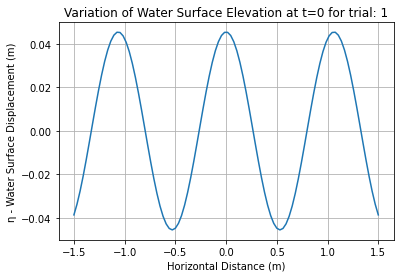

In [18]:
row0 = df.iloc[0]
modelOrbits(row0["H"], row0["L"], row0["T"], row0["trial"], -1.5, 1.5)

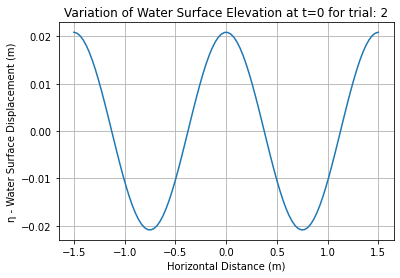

In [19]:
row1 = df.iloc[1]
modelOrbits(row1["H"], row1["L"], row1["T"], row1["trial"], -1.5, 1.5)

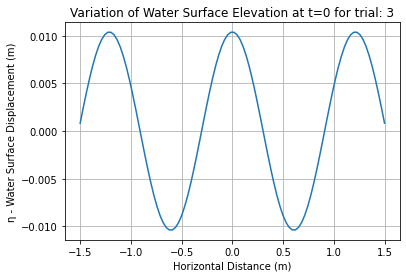

In [20]:
row2 = df.iloc[2]
modelOrbits(row2["H"], row2["L"], row2["T"], row2["trial"], -1.5, 1.5)

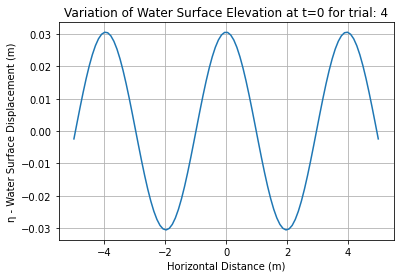

In [21]:
row3 = df.iloc[3]
modelOrbits(row3["H"], row3["L"], row3["T"], row3["trial"], -5, 5)

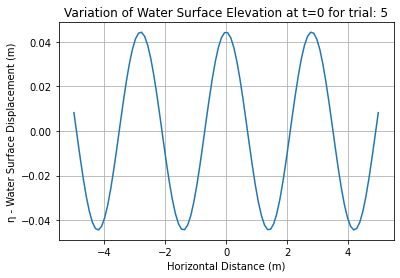

In [22]:
row4 = df.iloc[4]
modelOrbits(row4["H"], row4["L"], row4["T"], row4["trial"], -5, 5)

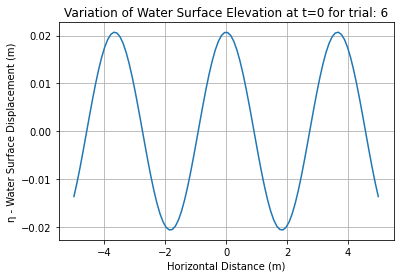

In [23]:
row5 = df.iloc[5]
modelOrbits(row5["H"], row5["L"], row5["T"], row5["trial"], -5, 5)

In [24]:
def getBottomOrbital(rows, d=0.18):
    if d/rows["L"] < 1/20:
        d_bot = rows["H"]/(((2*math.pi)/rows["L"])*d)
    else:
        d_bot = rows["H"]/(math.sinh((((2*math.pi)/rows["L"])*d)))
    return d_bot

In [25]:
def isShallow(rows, d=0.18):
    ratio = d/rows["L"]
    if ratio < 0.05:
        isShallow = True
    else:
        isShallow = False
    return isShallow

In [26]:
df["is_shallow"] = df.apply(isShallow, axis=1)

In [27]:
df

,trial,H,T,time_1m,orbital_surface,orbital_bottom,L,max_eta,orbital_surface_theoretical,is_shallow
0,1,0.0909,0.93,0.86,0.1000,0.0818,1.062983,0.04545,0.0909,False
1,2,0.0418,1.23,0.81,0.0460,0.0376,1.503455,0.02090,0.0418,False
2,3,0.0208,1.03,0.84,0.0229,0.0187,1.212361,0.01040,0.0208,False
3,4,0.0612,3.02,0.75,0.0673,0.0551,3.959891,0.03060,0.0612,True
4,5,0.0888,2.17,0.76,0.0976,0.0799,2.809474,0.04440,0.0888,False
5,6,0.0414,2.80,0.75,0.0455,0.0372,3.663358,0.02070,0.0414,True


In [28]:
df["orbital_bottom_theoretical"] = df.apply(getBottomOrbital, axis=1)

In [29]:
df

,trial,H,T,time_1m,orbital_surface,orbital_bottom,L,max_eta,orbital_surface_theoretical,is_shallow,orbital_bottom_theoretical
0,1,0.0909,0.93,0.86,0.1000,0.0818,1.062983,0.04545,0.0909,False,0.071218
1,2,0.0418,1.23,0.81,0.0460,0.0376,1.503455,0.02090,0.0418,False,0.050652
2,3,0.0208,1.03,0.84,0.0229,0.0187,1.212361,0.01040,0.0208,False,0.019364
3,4,0.0612,3.02,0.75,0.0673,0.0551,3.959891,0.03060,0.0612,True,0.214280
4,5,0.0888,2.17,0.76,0.0976,0.0799,2.809474,0.04440,0.0888,False,0.214743
5,6,0.0414,2.80,0.75,0.0455,0.0372,3.663358,0.02070,0.0414,True,0.134100


In [30]:
0.18/df.iloc[5]["L"]

0.049135250471998695

In [31]:
df[["trial", "is_shallow", "orbital_bottom_theoretical", "orbital_bottom"]]

,trial,is_shallow,orbital_bottom_theoretical,orbital_bottom
0,1,False,0.071218,0.0818
1,2,False,0.050652,0.0376
2,3,False,0.019364,0.0187
3,4,True,0.214280,0.0551
4,5,False,0.214743,0.0799
5,6,True,0.134100,0.0372


### Max Errors

In [32]:
ptA_df["errors_celerity"] = ptA_df.apply(lambda rows: abs((rows["c_actual"]-rows["c"])/rows["c"]), axis=1)
ptA_df[["trial", "c_actual","c", "errors_celerity"]]

,trial,c_actual,c,errors_celerity
0,1,1.162791,1.142993,0.017321
1,2,1.234568,1.222321,0.010019
2,3,1.190476,1.177050,0.011407
3,4,1.333333,1.311222,0.016863
4,5,1.315789,1.294689,0.016298
5,6,1.333333,1.308342,0.019101


In [33]:
ptA_df["errors_celerity"].max() * 100

1.9101491271083966

In [34]:
ptC_df = df[["trial", "orbital_surface", "orbital_bottom", "orbital_surface_theoretical", "orbital_bottom_theoretical"]].copy()

In [35]:
ptC_df

,trial,orbital_surface,orbital_bottom,orbital_surface_theoretical,orbital_bottom_theoretical
0,1,0.1000,0.0818,0.0909,0.071218
1,2,0.0460,0.0376,0.0418,0.050652
2,3,0.0229,0.0187,0.0208,0.019364
3,4,0.0673,0.0551,0.0612,0.214280
4,5,0.0976,0.0799,0.0888,0.214743
5,6,0.0455,0.0372,0.0414,0.134100


In [36]:
ptC_df["errors_surface"] = ptC_df.apply(lambda rows: abs((rows["orbital_surface"]-rows["orbital_surface_theoretical"])/rows["orbital_surface_theoretical"]), axis=1)

In [38]:
ptC_df[["trial","orbital_surface", "orbital_surface_theoretical", "errors_surface"]]

,trial,orbital_surface,orbital_surface_theoretical,errors_surface
0,1,0.1000,0.0909,0.100110
1,2,0.0460,0.0418,0.100478
2,3,0.0229,0.0208,0.100962
3,4,0.0673,0.0612,0.099673
4,5,0.0976,0.0888,0.099099
5,6,0.0455,0.0414,0.099034


In [44]:
ptC_df["errors_surface"].max() * 100

10.096153846153834

In [46]:
ptC_df["errors_surface"].mean()

0.0998926894167932

In [39]:
ptC_df["errors_bottom"] = ptC_df.apply(lambda rows: abs((rows["orbital_bottom"]-rows["orbital_bottom_theoretical"])/rows["orbital_bottom_theoretical"]), axis=1)
ptC_df[["trial","orbital_bottom", "orbital_bottom_theoretical", "errors_bottom"]]

,trial,orbital_bottom,orbital_bottom_theoretical,errors_bottom
0,1,0.0818,0.071218,0.148593
1,2,0.0376,0.050652,0.257687
2,3,0.0187,0.019364,0.034269
3,4,0.0551,0.214280,0.742860
4,5,0.0799,0.214743,0.627927
5,6,0.0372,0.134100,0.722594


In [45]:
ptC_df["errors_bottom"].max() * 100

74.28601854930228

In [47]:
ptC_df["errors_bottom"].mean()

0.4223216316107883

In [48]:
ptC_df["errors_bottom"].median()

0.44280678608727664